# **Chronic Kidney Disease Prediction**
**Date**: 3rd December, 2024

**Dataset**: [Chronic Kidney Disease Dataset](https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease)

**Context**:
The dataset originates from the UCI Machine Learning Repository and is designed to predict the likelihood of a patient having chronic kidney disease (CKD) based on specific diagnostic measurements.

**Content**:
The dataset contains various medical predictor variables and a target variable, Class. The predictor variables include diagnostic indicators such as Blood Pressure (Bp), Albumin (Al), and others.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:
df = pd.read_csv("new_model.csv")

## **Data Cleaning and Preprocessing**

- **Columns in the dataset include**:
    - Blood Pressure 
    - Specific Gravity
    - Albumin
    - Sugar
    - Red Blood Cell
    - Blood Urea
    - Serum Creatinine
    - Sodium
    - Potassium
    - Hemoglobin
    - White Blood Cell Count
    - Red Blood Cell Count
    - Hypertension
    - Predicted Class

In [4]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


- Here, the missing values are represented as 0.0. Hence to show these missing values 0.0 is replaced with NaN(Not a Number).

In [5]:
df = df.replace(0.0,np.NaN)

- In the columns, Sugar and Hypertension can be 0. Hence, these columns are not touched. Class is the target variable and hence 0 in Class is not considered as a missing value.

In [6]:
df['Su'] = df['Su'].replace(np.NaN,0.0)
df['Htn'] = df['Htn'].replace(np.NaN,0.0)
df['Class'] = df['Class'].replace(np.NaN,0)

In [7]:
df.isnull().sum()

Bp         0
Sg         0
Al       199
Su         0
Rbc       47
Bu         0
Sc         0
Sod        0
Pot        0
Hemo       0
Wbcc       0
Rbcc       0
Htn        0
Class      0
dtype: int64

- According to the above analysis, we get 199 missing values in Albumin and 47 missing values in Red Blood Cells.

In [8]:
df['Al'] = df['Al'].fillna(df['Al'].mean())
df['Rbc'] = df['Rbc'].fillna(df['Rbc'].mean())

- The columns namely Albumin and Red Blood Cells have missing values which are imputed with the mean of its column.

In [9]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

- We get a data cleaned from missing values

## **Data Visualization**

In [10]:
correlation_matrix = df.corr()
print(correlation_matrix["Class"].sort_values(ascending=False))


Class    1.000000
Htn      0.586340
Bu       0.371982
Su       0.294555
Sc       0.294076
Bp       0.290145
Wbcc     0.205266
Pot      0.077063
Al       0.034145
Sod     -0.342268
Rbcc    -0.590248
Sg      -0.659504
Hemo    -0.729537
Rbc           NaN
Name: Class, dtype: float64


- Accordingly, 'Sg', 'Sc', 'Hemo', 'Rbcc', 'Htn' columns have shown higher correlation with Class

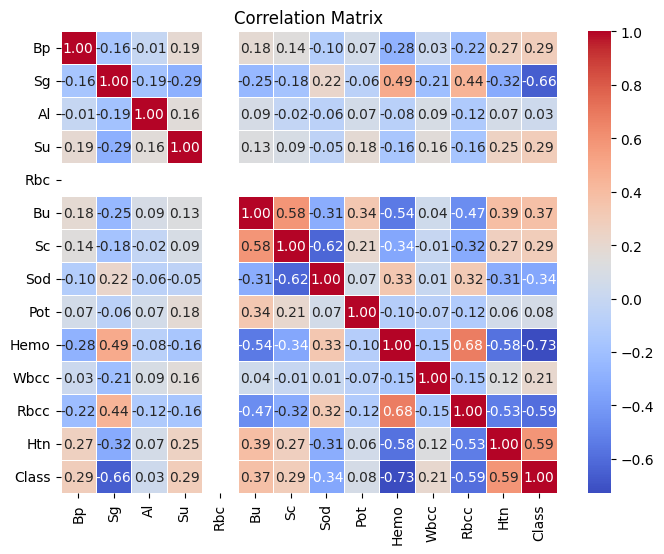

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- The correlation between different features can be visualised by the correlation matrix above

## **Splitting the data and Feature Selection**

In [16]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']              # Target

- The Data is split into X and y where X includes all the columns except the target variable and y contains the target column

In [17]:

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)
print("Selected Features:", X.columns[rfe.get_support()])


Selected Features: Index(['Sg', 'Sc', 'Hemo', 'Rbcc', 'Htn'], dtype='object')


- We include 5 best features namely 'Sg', 'Sc', 'Hemo', 'Rbcc', 'Htn'

In [18]:
selected_columns = ['Sg', 'Sc', 'Hemo', 'Rbcc', 'Htn']
X = df[selected_columns]
print(X.head())

      Sg   Sc  Hemo  Rbcc  Htn
0  1.020  1.2  15.4  5.20  1.0
1  1.020  0.8  11.3  4.71  0.0
2  1.010  1.8   9.6  4.71  0.0
3  1.005  3.8  11.2  3.90  1.0
4  1.010  1.4  11.6  4.60  0.0


- The Distribution of the Selected Features can be Visualised as shown below.

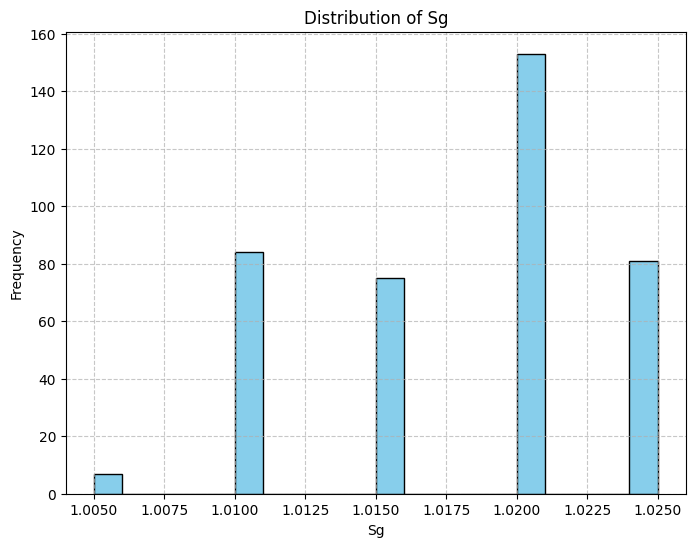

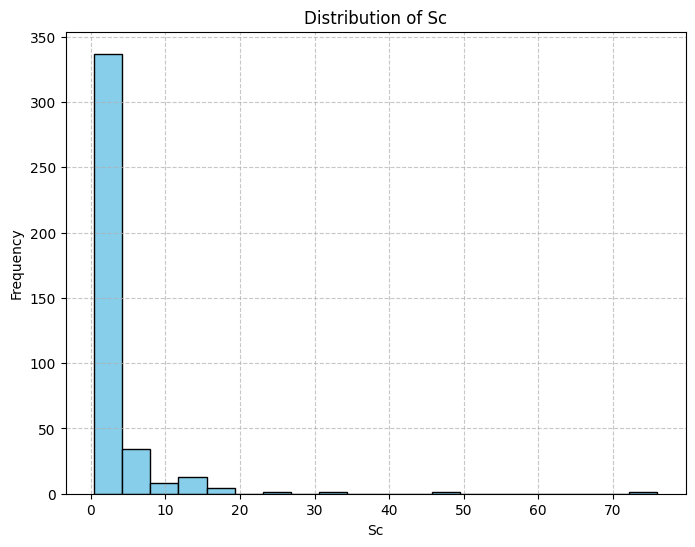

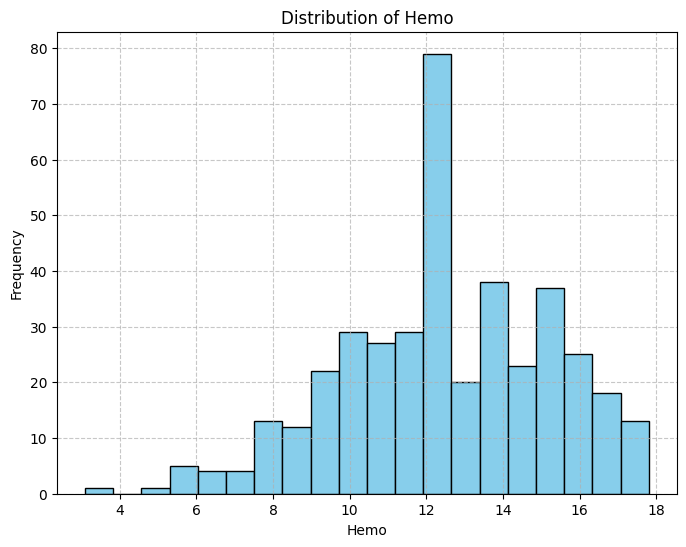

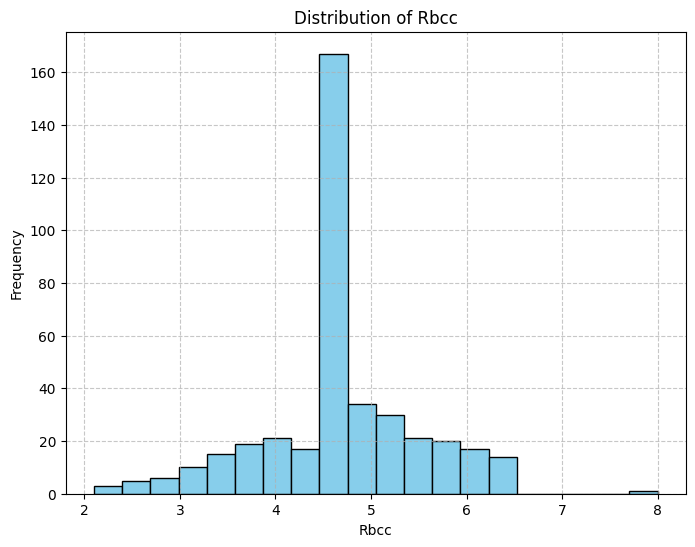

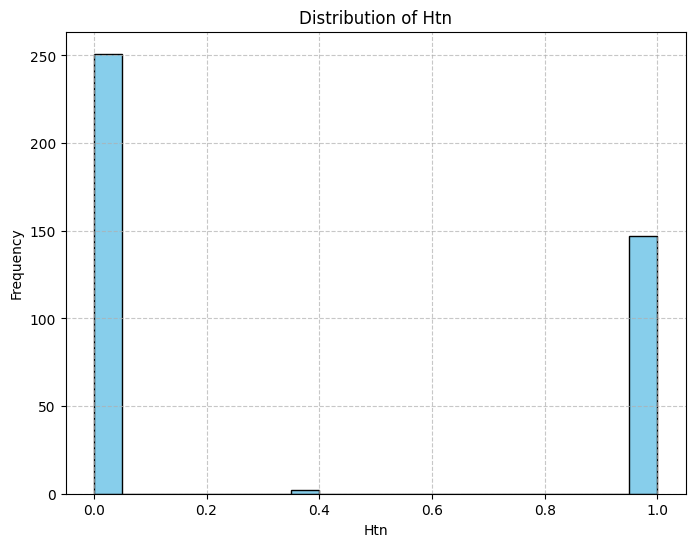

In [23]:

def plot_feature_distribution(data):
    features = ['Sg', 'Sc', 'Hemo', 'Rbcc', 'Htn']
    
    for feature in features:
        plt.figure(figsize=(8, 6))
        plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

plot_feature_distribution(X)


- The Data is split into training and testing data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Classification Model: Support Vector Machine(SVM)**

- The model used for classification is SVM. In SVM, it is necessary for the data to be scaled. Hence with StandardScaler, all the values are scaled to a common range.

In [58]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
pickle.dump(scaler,open('scaler.pkl','wb'))
scaler = pickle.load(open('scaler.pkl','rb'))

- This code trains a Support Vector Machine (SVM) classifier using the radial basis function (RBF) kernel on a dataset, tests its performance, and evaluates its accuracy.

In [60]:

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

## **Model Evaluation**

- The model's performance metrics like accuracy, precision,recall and f1-score are checked.

In [61]:
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 1.0000


In [62]:
precision = precision_score(y_test, svm_preds)
recall = recall_score(y_test, svm_preds)
f1 = f1_score(y_test, svm_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [63]:
pickle.dump(svm_model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

- The prediction is checked for the sample data given below.

In [64]:
# New data (as a dictionary or DataFrame)
new_data = {
    
    'Specific Gravity': [1.02],
    'Serum Creatinine': [1.2],
    'Hemoglobin': [13.5],
    'Red Blood Cell Count': [4.5],
    'Hypertension': [1]
}

new_data_df = pd.DataFrame(new_data)
new_data_scaled = scaler.fit_transform(new_data_df)



- The model predicts 1.0 that is CKD is present for the above values.

In [65]:
svm_prediction = svm_model.predict(new_data_df)
print(f"SVM Prediction: {svm_prediction[0]}")


SVM Prediction: 1.0


c:\Users\Kerissa College\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
